In [1]:
import urllib.request
from bs4 import BeautifulSoup
import os, pickle


url = 'http://www.hockey-reference.com/playoffs/overtime-goals.cgi'

#download
filehandle = urllib.request.urlopen(url)
html = filehandle.read()

#save file 
f = open('playoff-goals','w')
f.write(html.decode('utf-8'))
f.close()



In [2]:
html_doc = open('playoff-goals').read()
soup = BeautifulSoup(html_doc, 'html.parser')

# find table with relevant data
table = soup.find('table', { 'class' : 'sortable stats_table' })

# get all rows from table
rows = table.find_all('tr')

# list to hold times of goals scored
times = []

# only get games from 2006 through present
for each in rows[1:]:
    bingo = each.find('th', { 'data-stat' : 'date_game' }).text[:4] #date of game
    if int(bingo) >= 2006:
        bango = each.find('td', { 'data-stat' : 'time_elapsed' }).text #time goal was scored
        
        times.append(bango)




In [3]:
import re

# only take the minute of the time
minutes = []
for each in times:
    minute = re.match('\d+:', each).group(0)
    minutes.append(int(minute[:-1]))

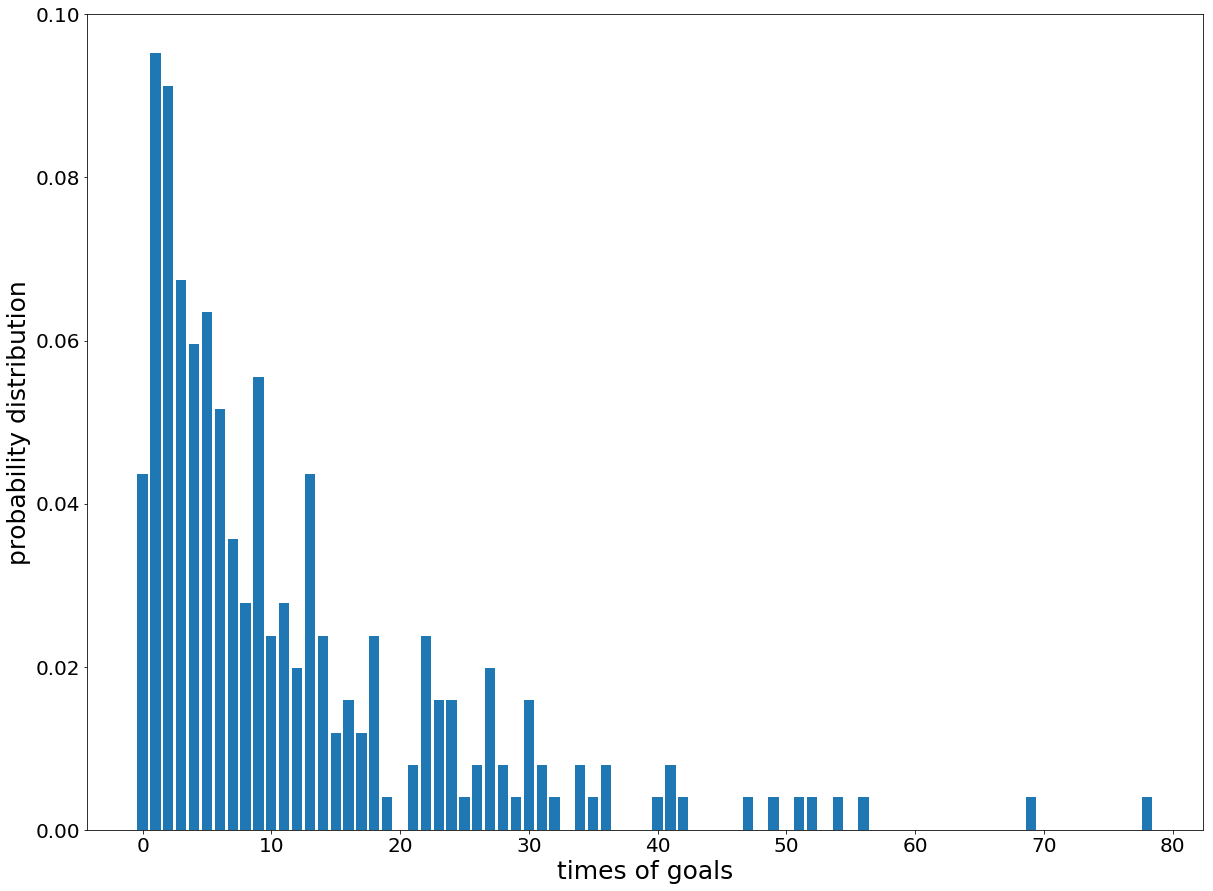

Total Goals: 252


In [4]:
import matplotlib.pyplot as plt, numpy as np


def measure_probability_distribution (outcomes):
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf


    

plt.figure(figsize=(20,15))
plt.xlabel('times of goals', fontsize = 25)
plt.ylabel('probability distribution', fontsize = 25)
plt.tick_params(labelsize=20)

pdf = measure_probability_distribution(minutes)


x = []
Px = []
for q in pdf:
    x.append(q)
    Px.append(pdf[q])



plt.bar(x, Px)


plt.show()
print('Total Goals:', len(minutes))